In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

def trainModel(model, epochNumber):
    (train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()
    model.summary()
    model.build()
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=epochNumber, 
                    validation_data=(test_images, test_labels))
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    print(test_acc)








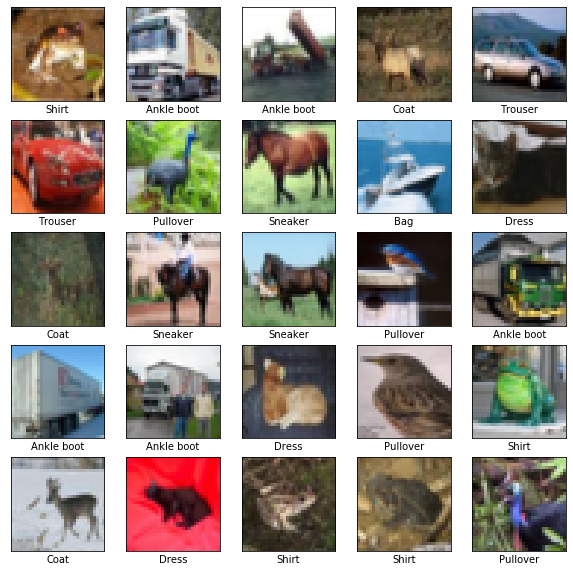

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32, 32, 128)       512       
_________________________________________________________________
dense_1 (Dense)              (None, 32, 32, 10)        1290      
Total params: 1,802
Trainable params: 1,802
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
   32/50000 [..............................] - ETA: 25:43

InternalError:  Blas GEMM launch failed : a.shape=(32768, 3), b.shape=(3, 128), m=32768, n=128, k=3
	 [[node sequential/dense/Tensordot/MatMul (defined at <ipython-input-1-8f2e4a6f13af>:32) ]] [Op:__inference_distributed_function_833]

Function call stack:
distributed_function


In [2]:

model = keras.Sequential([
    #keras.layers.Flatten(input_shape=(32, 32,3)),
    keras.layers.Dense(128, activation='relu', input_shape=(32, 32,3)),
    keras.layers.Dense(10)
])

trainModel(model, 30)

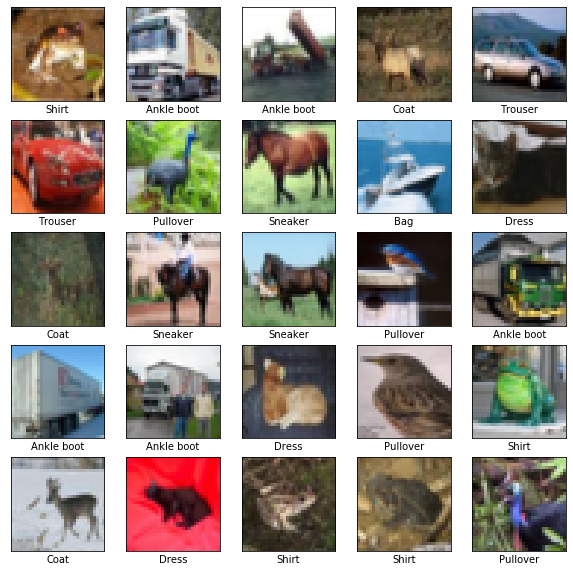

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 128)        

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (5, 5), padding="same", activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(64, (5, 5), padding="same", activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(128, (5, 5), padding="same", activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.4),                     
    keras.layers.Dense(10)
])

model.build((28,28,1))

trainModel(model, 100)

# ^^ This seems good

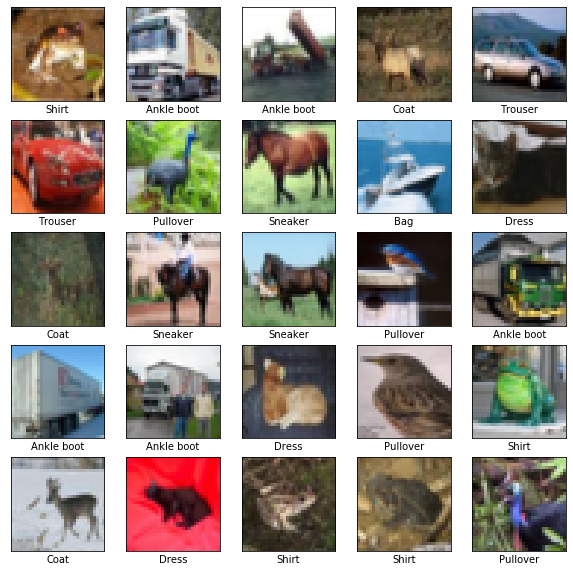

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)       

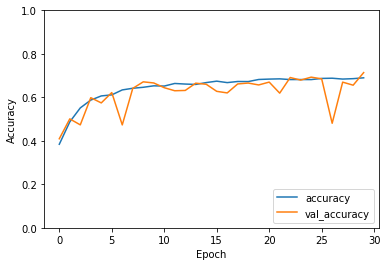

In [5]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=keras.regularizers.l2(1e-4), input_shape=(32,32,3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=keras.regularizers.l2(1e-4)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.2))
 
model.add(keras.layers.Conv2D(64, (3,3), padding='same', kernel_regularizer=keras.regularizers.l2(1e-4)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, (3,3), padding='same', kernel_regularizer=keras.regularizers.l2(1e-4)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.3))
 
model.add(keras.layers.Conv2D(128, (3,3), padding='same', kernel_regularizer=keras.regularizers.l2(1e-4)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(128, (3,3), padding='same', kernel_regularizer=keras.regularizers.l2(1e-4)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.4))
 
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))
 
trainModel(model, 30)

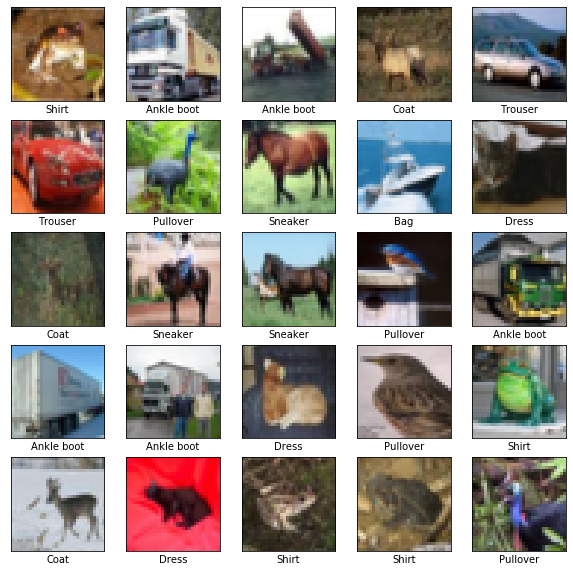

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dense_4 (Dense)              (None, 16, 16, 32)        1056      
_________________________________________________________________
activation_9 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 16, 16, 32)       

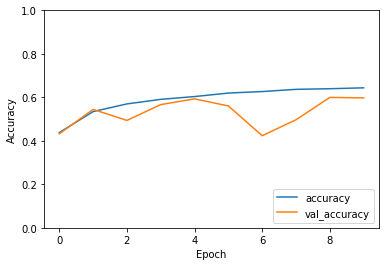

In [7]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(32,32,3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.MaxPooling2D( pool_size=(2,2)))

model.add(keras.layers.Dense(32))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.MaxPooling2D( pool_size=(2,2)))
model.add(keras.layers.Dropout(0.2))
 
#model.add(keras.layers.Conv2D(64, (3,3), padding='same'))
#model.add(keras.layers.Activation('relu'))
#model.add(keras.layers.BatchNormalization())

#model.add(keras.layers.Conv2D(64, (3,3), padding='same'))
#model.add(keras.layers.Activation('relu'))
#model.add(keras.layers.BatchNormalization())

#model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
#model.add(keras.layers.Dropout(0.3))
 
#model.add(keras.layers.Conv2D(128, (3,3), padding='same'))
#model.add(keras.layers.Activation('relu'))
#model.add(keras.layers.BatchNormalization())

#model.add(keras.layers.Conv2D(128, (3,3), padding='same'))
#model.add(keras.layers.Activation('relu'))
#model.add(keras.layers.BatchNormalization())

#model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
#model.add(keras.layers.Dropout(0.4))
 
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))
 
trainModel(model, 10)

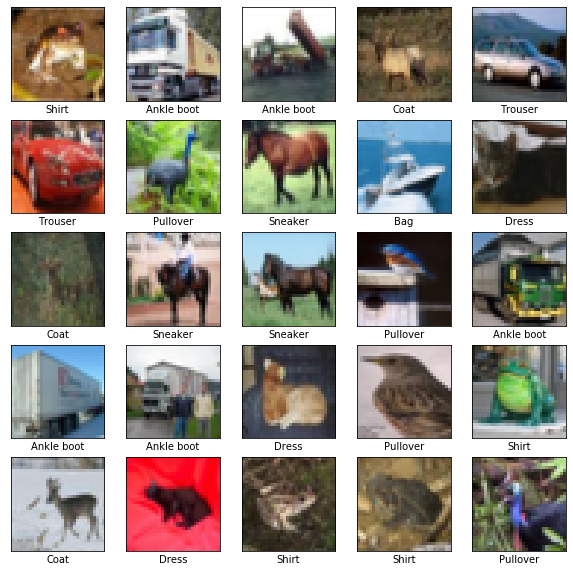

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                524352    
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

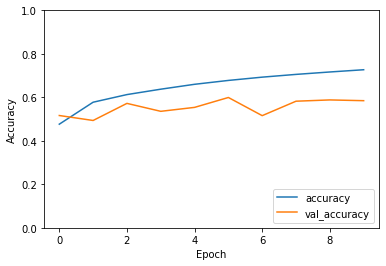

In [4]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(32,32,3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D( pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64))
model.add(keras.layers.Dense(10))

trainModel(model, 10)